In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, preprocessing

In [3]:
import tensorflow_datasets as tfds

In [4]:
max_len=200
n_words=10000
dim_embedding=256
EPOCHS=20
BATCH_SIZE=500    

In [6]:
def load_data():
  (X_train, y_train), (X_test, y_test) = datasets.imdb.load_data(num_words=n_words)
  X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen=max_len)
  X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen=max_len)
  return (X_train, y_train), (X_test, y_test)

In [8]:
(X_train, y_train), (X_test, y_test) = load_data()

17473536/17464789 [==============================] - 0s 0us/step


In [10]:
def build_model():
  model = models.Sequential()
  model.add(layers.Embedding(n_words,dim_embedding, input_length=max_len))
  model.add(layers.Dropout(0.3))
  model.add(layers.GlobalMaxPool1D())
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(1, activation='sigmoid'))
  return model

In [17]:
model = build_model()

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 256)          2560000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 200, 256)          0         
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 2,593,025
Trainable params: 2,593,025
Non-trainable params: 0
____________________________________________

In [19]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [20]:
model.fit(X_train,y_train,epochs=EPOCHS,batch_size=BATCH_SIZE,validation_data=(X_test,y_test))

Epoch 1/20
50/50 [==============================] - 24s 476ms/step - loss: 0.6771 - accuracy: 0.6387 - val_loss: 0.6432 - val_accuracy: 0.8336
Epoch 2/20
50/50 [==============================] - 23s 470ms/step - loss: 0.4776 - accuracy: 0.8354 - val_loss: 0.3675 - val_accuracy: 0.8558
Epoch 3/20
50/50 [==============================] - 24s 473ms/step - loss: 0.2824 - accuracy: 0.8854 - val_loss: 0.3047 - val_accuracy: 0.8745
Epoch 4/20
50/50 [==============================] - 24s 477ms/step - loss: 0.2187 - accuracy: 0.9156 - val_loss: 0.2909 - val_accuracy: 0.8796
Epoch 5/20
50/50 [==============================] - 24s 476ms/step - loss: 0.1736 - accuracy: 0.9368 - val_loss: 0.2890 - val_accuracy: 0.8781
Epoch 6/20
50/50 [==============================] - 24s 478ms/step - loss: 0.1365 - accuracy: 0.9538 - val_loss: 0.2914 - val_accuracy: 0.8768
Epoch 7/20
50/50 [==============================] - 24s 476ms/step - loss: 0.1068 - accuracy: 0.9656 - val_loss: 0.3021 - val_accuracy: 0.8714

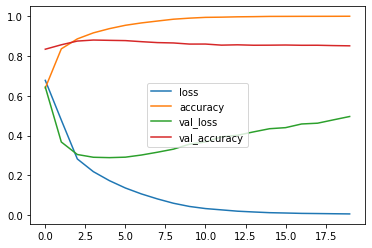

In [21]:
import pandas as pd
result = pd.DataFrame(model.history.history)
result.plot()

In [22]:
test_loss, test_acc = model.evaluate(X_test,y_test, batch_size=BATCH_SIZE)

50/50 [==============================] - 2s 45ms/step - loss: 0.4956 - accuracy: 0.8506


In [23]:
print('Test accuracy:',test_acc)

Test accuracy: 0.850600004196167


In [24]:
# Here my model overfit, so we have to do some changes with hyperparameters and batchnormalization may also work here